In [0]:
%ls /data/My\ Drive/dataset

datasets-v5.zip  d.zip  facdat.csv


In [0]:
%%bash
unzip /data/My\ Drive/dataset/datasets-v5.zip

Archive:  /data/My Drive/dataset/datasets-v5.zip
   creating: datasets-v5/
  inflating: datasets-v5/.DS_Store   
   creating: __MACOSX/
   creating: __MACOSX/datasets-v5/
  inflating: __MACOSX/datasets-v5/._.DS_Store  
  inflating: datasets-v5/README      
  inflating: __MACOSX/datasets-v5/._README  
   creating: datasets-v5/task-1/
  inflating: datasets-v5/task-1/.DS_Store  
   creating: __MACOSX/datasets-v5/task-1/
  inflating: __MACOSX/datasets-v5/task-1/._.DS_Store  
  inflating: datasets-v5/task-1/task1.train.txt  
  inflating: __MACOSX/datasets-v5/task-1/._task1.train.txt  
  inflating: __MACOSX/datasets-v5/._task-1  
   creating: datasets-v5/tasks-2-3/
  inflating: datasets-v5/tasks-2-3/.DS_Store  
   creating: __MACOSX/datasets-v5/tasks-2-3/
  inflating: __MACOSX/datasets-v5/tasks-2-3/._.DS_Store  
  inflating: datasets-v5/tasks-2-3/propaganda-techniques-names.txt  
  inflating: __MACOSX/datasets-v5/tasks-2-3/._propaganda-techniques-names.txt  
   creating: datasets-v5/tasks-2-

In [1]:
# Importing Necessary pakcages and modules
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
import pandas as pd
import gensim
import keras
import nltk
from sklearn.model_selection import train_test_split
import numpy as np
from wordcloud import WordCloud , STOPWORDS
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
Using TensorFlow backend.


In [0]:
import pandas as pd
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic
from nltk.wsd import lesk

In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nart

In [0]:
import pandas as pd
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic
from nltk.wsd import lesk
import textblob

In [0]:
# Reading the file for Task-1

with open('datasets-v5/task-1/task1.train.txt', encoding = 'utf8') as o:df=pd.DataFrame([i.split('\t') for i in o],columns=['text','id','tag'])

In [0]:
"""
Encoding the target variable into 0 or 1
"""
df['tag'] = df['tag'].map({'propaganda\n':1,'non-propaganda\n':0})

In [0]:
df

,text,id,tag
0,"Et tu, Rhody? A recent editorial in the Provi...",727600136,0
1,A recent post in The Farmington Mirror — our t...,731714618,0
2,"President Donald Trump, as he often does while...",731714635,0
3,"February is Black History Month, and nothing l...",728627182,0
4,"The snow was so heavy, whipped up by gusting w...",728627443,0
5,Four months after the Sandy Hook School shooti...,732126660,0
6,The first major newspaper article about Donald...,728144791,0
7,"For three years, starting in 2008, New York ar...",728605281,0
8,President Donald Trump's tumultuous administra...,731383701,0
9,With Hartford on edge about the future of Aetn...,734075146,0


In [0]:
# Preprocessing the dataset

def clean_dataset(text):

    docs=list(text)
    l = []
    lemmatizer=WordNetLemmatizer()
    for i in docs:
        tokens = word_tokenize(i)

        # convert to lower case
        tokens = [w.lower() for w in tokens]

        #for word in tokens:
        #    print(lemmatizer.lemmatize(word))


        # stemming of words
        porter = PorterStemmer()
        stemmed = [porter.stem(word) for word in tokens]

        # remove all tokens that are punctuations
        words = [word for word in stemmed if word.isalpha()]

        # remove all non alphabet words
        words = [word for word in words if word.isalpha()]

        # Remove stop words
        stop_words = set(STOPWORDS)
        words = [w for w in words if not w in stop_words]



        l.append(" ".join(words))
    docs = l
    return docs

In [0]:
docs = []
docs = clean_dataset(df['text'])

In [0]:
# dataframe containing only non-propagandistic articles 
# for making wordcloud
df_0 = df[df['tag']==0]
df_0.head()

,text,id,tag
0,"Et tu, Rhody? A recent editorial in the Provi...",727600136,0
1,A recent post in The Farmington Mirror — our t...,731714618,0
2,"President Donald Trump, as he often does while...",731714635,0
3,"February is Black History Month, and nothing l...",728627182,0
4,"The snow was so heavy, whipped up by gusting w...",728627443,0


In [0]:
# dataframe containing only propagandistic articles
# for making wordcloud
df_1 = df[df['tag'] == 1]
df_1.head()

,text,id,tag
31972,NEW YORK — A Dominican national was sentenced ...,752304624,1
31973,"Samuel Rahamin Topaz, 24, of Fort Lee, New Jer...",752314882,1
31974,OREGON — Oregon Department of Fish and Wildlif...,752958408,1
31975,"A North Carolina man, who previously lived in ...",753003915,1
31976,FLORIDA — Police were responding to an active ...,758159207,1


In [0]:
nltk.download('punkt')

In [0]:
docs_0 = clean_dataset(df_0['text'])

In [0]:
docs_1 = clean_dataset(df_1['text'])

In [0]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()



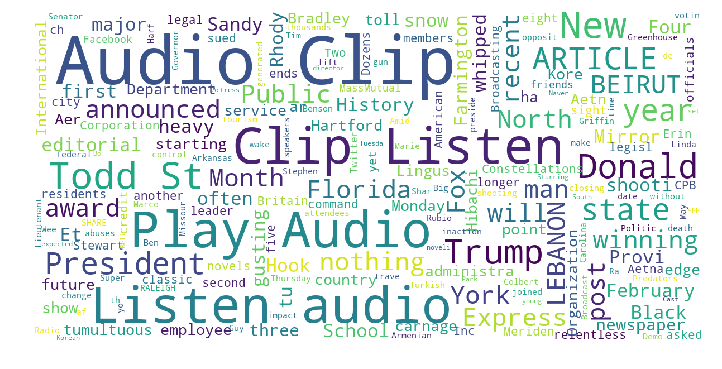

In [0]:
# Word cloud for Non-propoganda
show_wordcloud(df_0['text'])


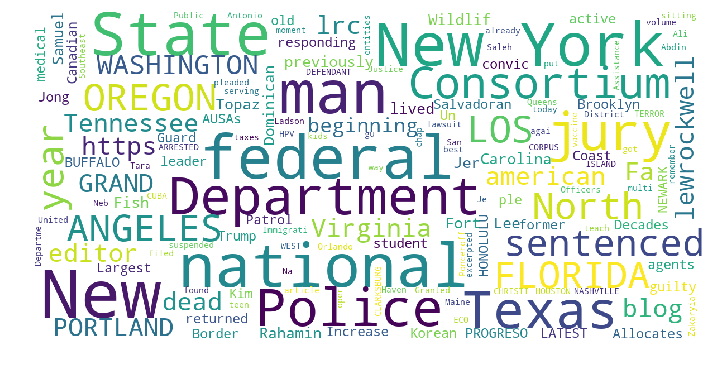

In [0]:
# Word cloud for Propoganda
show_wordcloud(df_1['text'])


In [0]:
"""
Model-1
Using the preprocess dataset we now convert our textual data to 
Vectors using tfidfvectorizer()
""";

In [0]:
vectorizer = TfidfVectorizer()
X_transformed = vectorizer.fit_transform(docs)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed,df['tag'],test_size = 0.20)

In [0]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = svclassifier.predict(X_test)  
print("SVM ACCURACY:",100 * accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))

SVM ACCURACY: 95.94388109459648


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      6353
           1       0.91      0.73      0.81       846

   micro avg       0.96      0.96      0.96      7199
   macro avg       0.94      0.86      0.89      7199
weighted avg       0.96      0.96      0.96      7199



In [0]:
"""
Model-2
Using the dense vector strategy
"""

'\nModel-2\nUsing the dense vector strategy\n'

In [0]:

# Vectorising the text features into a dense matrix using SVD 

# This is done by passing the tf-idf vectorised matrix to SVD model

X = sparse_random_matrix(100, 100, density=0.01, random_state=42)
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)

X_transformed_sparse = svd.fit_transform(X_transformed)
# Here we get the dense matrix 

In [0]:
X_train_sparse, X_test_sparse, y_train_sparse, y_test_sparse = train_test_split(X_transformed_sparse,df['tag'],test_size = 0.20)

In [0]:
# Training SVM model

svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train_sparse, y_train_sparse)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
# Calculating the accuracy of our (linear classifier) trained SVM model

y_pred_sparse = svclassifier.predict(X_test_sparse)  
print("SVM ACCURACY:",100 * accuracy_score(y_test_sparse, y_pred_sparse))
print('\n')
print(classification_report(y_test_sparse,y_pred_sparse))

SVM ACCURACY: 89.65134046395332


              precision    recall  f1-score   support

           0       0.90      1.00      0.95      6454
           1       0.00      0.00      0.00       745

   micro avg       0.90      0.90      0.90      7199
   macro avg       0.45      0.50      0.47      7199
weighted avg       0.80      0.90      0.85      7199



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
"""
Model-3
We now use a non-linear model, ANN using Goggle word2vec pretrained vectors 
""";

In [0]:
# Loading the word2vec GoogleNews vectors
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [0]:
porter = PorterStemmer()
docs=[[porter.stem(word.lower()) for word in word_tokenize(j) if word.isalpha()] for j in df['text']]

In [0]:
# Converting all the sentences into vector sum of their constituent words
docsm=[]
for i in docs:
  dsm=[0]*300
  for j in i:
    try:dsm+=model.word_vec(j)
        # taking sum of all the vectors in the sentence
    except:pass
  docsm.append(dsm)

In [0]:
yt=[]
for i in df['tag']:
  if i==1:yt.append(np.array([0,1]))
  else:yt.append(np.array([1,0]))
xnp=np.array([np.array(i) for i in docsm])

# Train-test split for ANN
xtr,xtt,ytr,ytt=train_test_split(xnp,yt)

In [0]:
# 2 hidden layers - sigmoid and softmax
mmod=keras.Sequential()
mmod.add(keras.layers.core.Dense(300, input_shape=(300,), activation="tanh"))
mmod.add(keras.layers.core.Dense(512, activation="tanh"))
mmod.add(keras.layers.core.Dense(2, activation="tanh"))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# stochastic gradient descent
opt = keras.optimizers.SGD()


In [0]:
mmod.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [0]:
# Training and testing the model

H = mmod.fit([xtr], [ytr], validation_data=([xtt], [ytt]),epochs=50, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Train on 26994 samples, validate on 8999 samples
Epoch 1/50
26994/26994 [==============================] - 5s 180us/step - loss: 1.8136 - acc: 0.8866 - val_loss: 1.7606 - val_acc: 0.8908
Epoch 2/50
26994/26994 [==============================] - 4s 151us/step - loss: 1.8140 - acc: 0.8875 - val_loss: 1.7606 - val_acc: 0.8908
Epoch 3/50
26994/26994 [==============================] - 4s 155us/step - loss: 1.8140 - acc: 0.8875 - val_loss: 1.7606 - val_acc: 0.8908
Epoch 4/50
26994/26994 [==============================] - 4s 156us/step - loss: 1.8140 - acc: 0.8875 - val_loss: 1.7606 - val_acc: 0.8908
Epoch 5/50
26994/26994 [==============================] - 4s 150us/step - loss: 1.8140 - acc: 0.8875 - val_loss: 1.7606 - val_acc: 0.8908
Epoch 6/50
26994/26994 [==============================] - 4s 159us/step - loss: 1.8140 - acc: 0.8875 - val_loss: 1.7606 - val_acc: 0.8908
Epoch 7/50
26994/26994 [==============================] - 4s 153us/step - l

In [0]:
"""
Model-4

Instead of using words as features for classification, we use the 
sentiment value to predict the tag
"""

In [0]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
sid = SentimentIntensityAnalyzer()


In [0]:
message_text = clean_dataset(df['text'])
docs[0]

In [0]:
scores =[]

In [0]:
for i in message_text:
    scores.append( sid.polarity_scores(i) )

In [0]:
df_new = pd.DataFrame() #creates a new dataframe that's empty


In [0]:
sentiment = []

In [0]:
for i in scores:
    sentiment.append(i['compound'])

In [0]:
df_new['input_feature'] = sentiment

In [0]:
df['tag']

In [0]:
df_new['tag'] = df['tag']

In [0]:
df_new

In [0]:
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(df_new['input_feature'],df_new['tag'],test_size = 0.20)

In [0]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train_sentiment.values.reshape(-1,1), y_train_sentiment)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred_sentiment = svclassifier.predict(X_test_sentiment.values.reshape(-1,1))  
print("SVM ACCURACY:",100 * accuracy_score(y_test_sentiment, y_pred_sentiment))
print('\n')
print(classification_report(y_test_sentiment,y_pred_sentiment))

SVM ACCURACY: 89.01236282817058


              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6408
           1       0.00      0.00      0.00       791

   micro avg       0.89      0.89      0.89      7199
   macro avg       0.45      0.50      0.47      7199
weighted avg       0.79      0.89      0.84      7199



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
"""
Task-2 Begins
Red_Herring
Using senetence similarity to detect propaganda at sentence level
""";

In [0]:
nltk.download(['wordnet_ic','wordnet'])

In [0]:
brown_ic = wordnet_ic.ic('ic-brown.dat')
pg,npg=[],[]

In [0]:
names =['article999001621', 'article111111124', 'article788726416', 'article754231597', 'article700551604', 'article775448623', 'article727405181', 'article723823436', 'article786919720', 'article703698295', 'article776616374', 'article723844295', 'article695108099', 'article738060046', 'article764518567', 'article789370909', 'article111111137', 'article999001619', 'article999001188', 'article758512204', 'article761334950', 'article790665855', 'article764609985', 'article999000870', 'article762206044', 'article698018235', 'article763761219', 'article772947654', 'article729549972', 'article697444415', 'article7618745059', 'article724791253', 'article788173482', 'article755814432', 'article790667730', 'article710376094', 'article770376380', 'article729303442', 'article793921939', 'article786250729', 'article725238842', 'article771254016', 'article111111112', 'article724095598', 'article728680557', 'article776373795', 'article706661242', 'article761546223', 'article700662577', 'article769962236', 'article723883127', 'article722512241', 'article999000312', 'article7618970899', 'article999001293', 'article761897089', 'article755459860', 'article762340819', 'article763440871', 'article761968851', 'article729578579', 'article741923579', 'article721406153', 'article738207834', 'article703821117', 'article765982381', 'article754111899', 'article771879020', 'article698780559', 'article765385479', 'article762200179', 'article7385423989', 'article759468687', 'article773748383', 'article7646642839', 'article770581969', 'article999001287', 'article730559808', 'article727736595', 'article787142429', 'article795379208', 'article755393220', 'article739140767', 'article694327499', 'article727736557', 'article7383612089', 'article732154721', 'article780414700', 'article111111122', 'article732708002', 'article774904810', 'article735815173', 'article703806098', 'article790777028', 'article731762731', 'article733754480', 'article793467906', 'article756114837', 'article727497152', 'article776049384', 'article696264594', 'article695833178', 'article773937361', 'article758385628', 'article788816478', 'article769682854', 'article770156851', 'article999000147', 'article731927633', 'article780786973', 'article786527921', 'article999001226', 'article729651527', 'article789121265', 'article774007496', 'article727128296', 'article731511020', 'article793534424', 'article781768042', 'article730652769', 'article732610971', 'article761610997', 'article731513824', 'article770877978', 'article757713354', 'article771546417', 'article712382330', 'article766942310', 'article795079843', 'article787955075', 'article111111113', 'article765913191', 'article696694316', 'article752287274', 'article762546428', 'article697454736', 'article774145019', 'article728153988', 'article728972961', 'article697472447', 'article698092698', 'article787529309', 'article770945799', 'article729700539', 'article789121798', 'article789615291', 'article758812201', 'article782086447', 'article724095467', 'article694811415', 'article761969038', 'article7651970399', 'article111111132', 'article711964584', 'article721890296', 'article711596363', 'article715790840', 'article755170235', 'article730865684', 'article754508491', 'article773520636', 'article781577820', 'article758882558', 'article715588833', 'article729561658', 'article729581752', 'article737255982', 'article727658675', 'article701553469', 'article762956953', 'article7666320169', 'article761674108', 'article730573740', 'article737457870', 'article697063039', 'article730268758', 'article754179642', 'article729668796', 'article795691173', 'article701939679', 'article761780613', 'article728343601', 'article696246189', 'article770956434', 'article705409419', 'article787759779', 'article740356006', 'article795703371', 'article729670169', 'article777488669', 'article727174208', 'article701225819', 'article697959084', 'article790720714', 'article729410793', 'article111111131', 'article790483991', 'article999000880', 'article999000159', 'article999001296', 'article111111134', 'article757611486', 'article770221823', 'article758469195', 'article757964238', 'article769427494', 'article727634031', 'article711566593', 'article713130996', 'article757843275', 'article762152527', 'article725498022', 'article778139122', 'article774637726', 'article716469423', 'article790266787', 'article761969692', 'article761874505', 'article776368676', 'article764715911', 'article728169864', 'article789370998', 'article795693029', 'article730222442', 'article7384471099', 'article790720480', 'article759337941', 'article769752554', 'article999000145', 'article762147609', 'article737194975', 'article782017101', 'article788056108', 'article781847297', 'article771406408', 'article999001241', 'article7709564349', 'article704591553', 'article741655444', 'article778664280', 'article770156173', 'article696735702', 'article706600938', 'article757171650', 'article730149656', 'article729348908', 'article711622457', 'article787668628', 'article783702663', 'article701837665', 'article7709388279', 'article702077783', 'article754131438', 'article761564397', 'article729940206', 'article758472954', 'article763260610', 'article754402671', 'article754348478', 'article788900262', 'article762160164', 'article776345502', 'article769962328', 'article718312499', 'article731063195', 'article780619695', 'article727869189', 'article790677230', 'article786344683', 'article731178960', 'article757243988', 'article697996062', 'article736231219', 'article999001297', 'article758477392', 'article727493378', 'article704856340', 'article999000849', 'article999000894', 'article795689901', 'article758386255', 'article728758697', 'article771655795', 'article765953146', 'article758669180', 'article758756657', 'article730237078', 'article706636401', 'article759478604', 'article702077434', 'article741802985', 'article782149225', 'article770938827']

In [0]:
%ls datasets-v5/tasks-2-3/train/

In [0]:
dlines=[]
for i in names:
    with open('datasets-v5/tasks-2-3/train/'+i+'.txt')as o:
        lines=[i for i in o.readlines()]
        #print(lines)
    with open('datasets-v5/tasks-2-3/train/'+i+'.task2.labels')as o:
        lb=[i.split('\t')[2].strip() for i in o.readlines()]
    for i in range(len(lines)-1,-1,-1):
        if lines[i]=='\n':
            del(lb[i],lines[i])
    dlines.append([lines,lb])

In [0]:
dlines[1]

In [0]:
def lch2_similarity(a,b,c):
    try :ret=wn.lch_similarity(a,b)
    except:ret=0.00001
    return ret or 0


In [0]:
wn.synset('cat.n.01')

Synset('cat.n.01')

In [0]:
def sent_sim(x,y):
    from math import sqrt
    pos_lookup={'NN':'n','VB':'v','JJ':'a','RB':'r'}
    a=[(j[0].lower(),pos_lookup[j[1][:2]]) for j in nltk.pos_tag(nltk.word_tokenize(x))\
       if j[0].isalpha() and j[1][:2] in pos_lookup]
    
    b=[(j[0].lower(),pos_lookup[j[1][:2]]) for j in nltk.pos_tag(nltk.word_tokenize(y))\
       if j[0].isalpha() and j[1][:2] in pos_lookup]
    sa=[]
    for j in a:
        try:sa.append(wn.synset(j[0]+'.'+j[1]+'.01'))
        except:pass
    sb=[]
    for j in b:
        try:sb.append(wn.synset(j[0]+'.'+j[1]+'.01'))
        except:pass
    vocab=list(set(sa+sb))
    vec1=[0]*len(vocab)
    vec2=[0]*len(vocab)
    for i in sa:
        vec1[vocab.index(i)]=1
    for i in sb:
        vec2[vocab.index(i)]=1
    #print(vec1,vec2)
    for i in range(len(vocab)):
        if vec1[i]==0:
            #print([lch2_similarity(vocab[i],j) for j in sb])
            vec1[i]=max([lch2_similarity(vocab[i],j,brown_ic) for j in sb]+[0])
        if vec2[i]==0:
            vec2[i]=max([lch2_similarity(vocab[i],j,brown_ic) for j in sa]+[0])
    #print(vec1,vec2)
    s=sum(vec1[i]*vec2[i] for i in range(len(vocab)))
    d1=sqrt(1+sum(j**2 for j in vec1))
    d2=sqrt(1+sum(1+j**2 for j in vec2))
    return s/(d1*d2)

In [0]:
nltk.download(['averaged_perceptron_tagger','punkt'])

In [0]:
dlines[0]

In [0]:
correct=0
total=0
pg,npg=[],[]
for lines,lb in dlines:
    for i in range(1,len(lines)):
        v=sent_sim(lines[0],lines[i])
        #print(v)
        if v>0.75:
            #print(lb[i])
            if lb[i] == 'non-propaganda':correct+=1
            total+=1
            #else:pass
        if lb[i] == 'propaganda':pg.append(v)
        else:npg.append(v)
        

In [0]:
print('accuracy for detecting red-herring propaganda using sentence similarity:',str(100*correct/total)+'%')

accuracy for detecting red-herring propaganda using sentence similarity: 82.65107212475634%


In [0]:
pgc,npgc=pg,npg

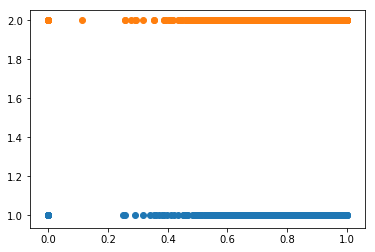

In [0]:
plt.scatter(pgc,[1]*len(pgc))
plt.scatter(npgc,[2]*len(npgc))
plt.show()

In [0]:
"""
Task 2 by using Loaded Language to detect propaganda since it has been noticed they contain extreme language
extreme positive or negative language
""";

In [0]:
pg,npg=[],[]

In [0]:
import textblob

In [0]:
sanz=textblob.sentiments.PatternAnalyzer()

In [0]:
correct,total=0,0
for lines,lb in dlines:
    for i in range(len(lines)):
        sc=0
        tok=list(textblob.tokenizers.sent_tokenize(lines[i]))
        #print(tok)
        for j in tok:
            sc+=sanz.analyze(j).polarity
        if sc/len(tok)>0.95:
            if lb[i]=='propaganda':correct+=1
            total+=1


In [0]:
print('accuracy of detecting loaded language propaganda:',str(100*correct/total)+'%')

accuracy of detecting loaded language propaganda: 39.285714285714285%


In [0]:
%pip install textacy

In [0]:
from textacy import lexicon_methods
import textacy
import spacy
en=spacy.load('en')

In [0]:
lexicon_methods.download_depechemood()

In [0]:
r=lexicon_methods.emotional_valence(en('This food is awesome'))

In [0]:
list(r.values())

In [0]:

sentences,labels=[],[]
for i in names:
    with open('datasets-v5/tasks-2-3/train/'+i+'.txt')as o:
        lines=[i for i in o.readlines()]
    with open('datasets-v5/tasks-2-3/train/'+i+'.task2.labels')as o:
        lb=[i.split('\t')[2].strip() for i in o.readlines()]
    for i in range(len(lines)-1,-1,-1):
        if lines[i]=='\n':
            del(lb[i],lines[i])
    sentences.extend(lines);labels.extend(lb)

In [0]:
X,Y=[],[]
for i in range(len(sentences)):
    val=list(lexicon_methods.emotional_valence(en(sentences[i])).values())
    if len(val)!=8:continue
    X.append(val)
    Y.append(labels[i]=='propaganda')
    

In [0]:
X_train, X_test, y_train, y_test=train_test_split(X,Y)

In [0]:
svclassifier = SVC()  
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
yepred = svclassifier.predict(X_test) 
accuracy_score(yepred,y_test)

0.7175817757009346

In [2]:
from google.colab import drive
drive.mount('data')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at data


In [0]:
with open('data/My Drive/task1.train.txt', encoding = 'utf8') as o:trainDF=pd.DataFrame([i.split('\t') for i in o],columns=['text','id','tag'])

In [0]:
trainDF['tag'] = trainDF['tag'].map({'propaganda\n':1,'non-propaganda\n':0})

In [0]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas as pd, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['tag'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [0]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [12]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("Navie Bayes, Count Vectors: ", accuracy)

Navie Bayes, Count Vectors:  0.9228803200355595


In [13]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print("Linear classifier, Count Vectors: ", accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Linear classifier, Count Vectors:  0.9573285920657851


In [14]:
accuracy = train_model(svm.SVC(), xtrain_count, train_y, xvalid_count)
print("SVM on Count Vectors: ", accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM on Count Vectors:  0.8940993443715969


In [17]:
# RF on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print("RF, Count Vectors: ", accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF, Count Vectors:  0.8934326036226248


In [18]:
# Extereme Gradient Boosting on Count Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print("Xgb, Count Vectors: ", accuracy)

Xgb, Count Vectors:  0.894654961662407


In [0]:
#word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(trainDF['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(trainDF['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(trainDF['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)

In [21]:
# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

NB, WordLevel TF-IDF:  0.9317701966885209


In [22]:
# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

NB, N-Gram Vectors:  0.9311034559395488


In [23]:
# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("NB, CharLevel Vectors: ", accuracy)

NB, CharLevel Vectors:  0.8980997888654295


In [24]:
# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR, WordLevel TF-IDF:  0.9496610734526059


In [25]:
# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR, N-Gram Vectors:  0.9463273697077453


In [26]:
# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("LR, CharLevel Vectors: ", accuracy)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR, CharLevel Vectors:  0.9389932214690521


In [27]:
# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print("RF, WordLevel TF-IDF: ", accuracy)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF, WordLevel TF-IDF:  0.919546616290699


In [28]:
# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print("Xgb, WordLevel TF-IDF: ", accuracy)


Xgb, WordLevel TF-IDF:  0.9439937770863429


In [29]:
# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc())
print("Xgb, CharLevel Vectors: ", accuracy)


Xgb, CharLevel Vectors:  0.9468829869985554


In [30]:
%%bash
wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

--2019-04-27 14:28:05--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.6.166, 104.20.22.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.6.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

     0K .......... .......... .......... .......... ..........  0%  372K 29m50s
    50K .......... .......... .......... .......... ..........  0% 5.01M 16m0s
   100K .......... .......... .......... .......... ..........  0%  851K 15m1s
   150K .......... .......... .......... .......... ..........  0% 7.32M 11m38s
   200K .......... .......... .......... .......... ..........  0%  893K 11m47s
   250K .......... .......... .......... .......... ..........  0% 27.1M 9m53s
   300K .......... .......... .......... .......... ..........  0% 17.1M 8

In [31]:
%%bash
unzip  wiki-news-300d-1M.vec.zip

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [0]:
embeddings_index = {}
for i, line in enumerate(open('wiki-news-300d-1M.vec')):
    values = line.split()
    embeddings_index[values[0]] = numpy.asarray(values[1:], dtype='float32')

# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(trainDF['text'])
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)

# create token-embedding mapping
embedding_matrix = numpy.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [0]:
from keras import optimizers
input_layer = layers.Input((70, ))

    # Add the word embedding Layer
embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
lstm_layer = layers.LSTM(100)(embedding_layer)

    # Add the output Layers
output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
output_layer1 = layers.Dropout(0.25)(output_layer1)
output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
model = models.Model(inputs=input_layer, outputs=output_layer2)
model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
        # fit the training dataset on the classifier
model.fit(train_seq_x, train_y,16,20)
    
    # predict the labels on validation dataset
predictions = model.predict(valid_seq_x)
    

Epoch 1/20
26994/26994 [==============================] - 140s 5ms/step - loss: 0.2670
Epoch 2/20
26994/26994 [==============================] - 137s 5ms/step - loss: 0.2059
Epoch 3/20
26994/26994 [==============================] - 137s 5ms/step - loss: 0.1811
Epoch 4/20
26994/26994 [==============================] - 136s 5ms/step - loss: 0.1676
Epoch 5/20
26994/26994 [==============================] - 137s 5ms/step - loss: 0.1562
Epoch 6/20
 5712/26994 [=====>........................] - ETA: 1:47 - loss: 0.1356

In [35]:
predictions = predictions.argmax(axis=-1)
print(metrics.accuracy_score(predictions, valid_y)) 

0.894654961662407
